   # Advanced Twitter Sentiment Classification Solution

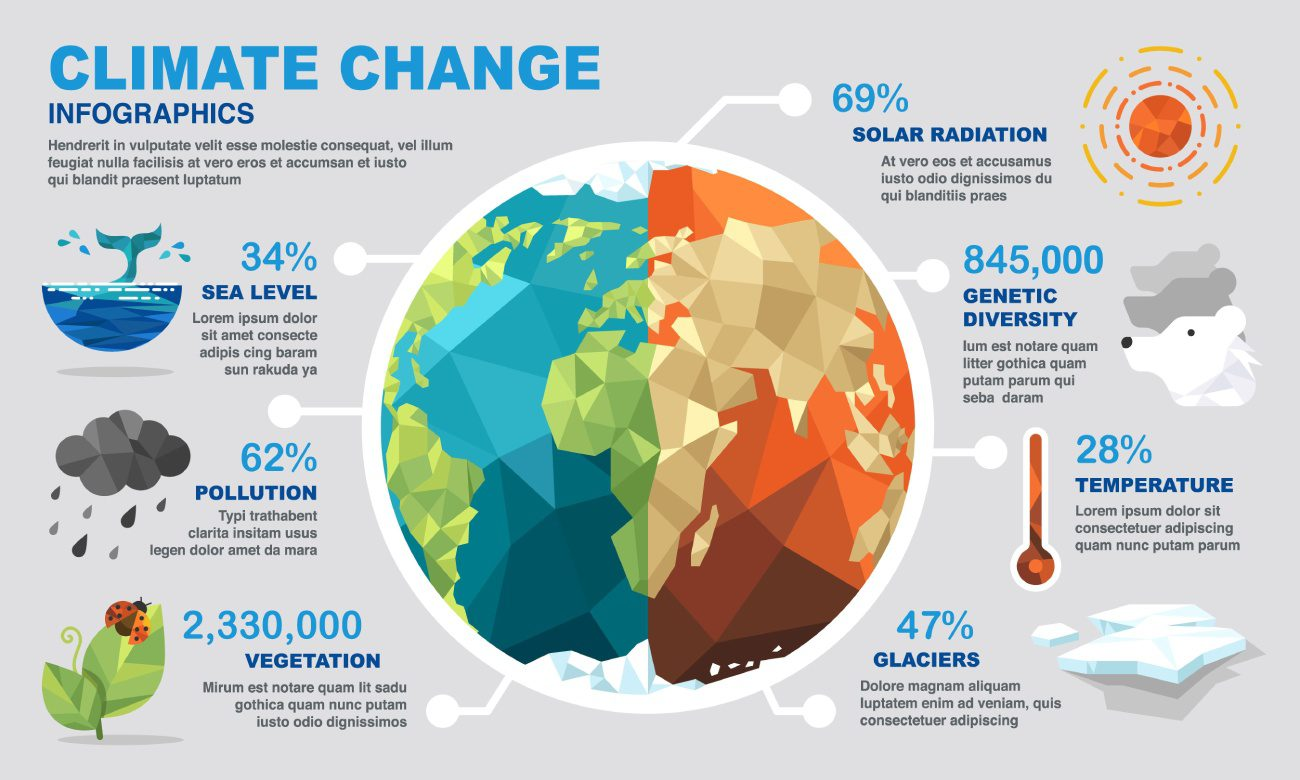

# 1. INTRODUCTION
## 1.1 RR10 PRIME TECH CONSULT

RR10 Prime Tech Consult provides data and analytics solutions that enable clients to gain valuable insights from their data, make informed decisions in a timely manner, and consistently stay ahead of the competition.
    

## 1.2 Project Summary
Numerous companies are established with the aim of reducing negative environmental impact especially those that lead to  
execess carbon emission. These companies provide eco-friendly and sustainable products and services that align with their 
core values and principles. They are interested in assessing public perceptions of climate change and determining whether 
it is regarded as a genuine threat. Such insights would contribute to their market research endeavors by providing an 
understanding of how their products or services might be received.

## 1.3 Problem Statement
Presently, climate change represents a global threat that significantly impacts our society. However, a concerning issue 
arises in the form of a discrepancy between authentic scientific discoveries regarding the true nature of climate change 
and the manipulation of climate change narratives by politicians for their own opportunistic gains. Consequently, a 
profound division emerges among individuals, both offline and online platforms like Twitter, regarding their interpretations 
of climate change. This situation places commercial organizations, regardless of their size, in a precarious position as they 
strive to determine the most appropriate stance to adopt—whether it be opposing, supporting, or remaining neutral toward 
climate change. As a response to this challenge, the focus of this project centers around the development of climate change 
classifier models. These models utilize a vast dataset consisting of thousands of tweets to predict the sentiment of Twitter 
users towards climate change.

## 1.4 Source of Data
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. 
The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 
tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### 1.4.1 Class Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions
    
### 1.4.2 Features

sentiment: Which class a tweet belongs in (refer to Class Description above)

message: Tweet body

tweetid: Twitter unique id
    
## 1.5 Aim and specific objectives

### 1.5.1 Aim
The primary aim of this undertaking was to construct a range of classifier models with the ability to forecast the 
sentiment expressed by Twitter users concerning climate change, achieving an accuracy level between 70% and 80%. 

### 1.5.2 Specific objectives
The specific objectives were to:
    
1. Quantify the volume of messages within each sentiment category (Anti, Neutral, Pro, News)
2. Evaluate the top 10 hashtags predominantly associated with each sentiment category
3. Analyze word clouds for each sentiment category
4. Create five classifier models that could effectively predict the sentiment related to climate change, utilizing the 
   F1-score as the evaluation metric.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>
    
<a href=#five>5. Data pre-processing</a>

<a href=#six>6. Data Engineering</a>

<a href=#seven>7. Modeling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Model Explanations</a>

<a href=#ten>10. Conclusion</a>
    
<a href=#eleven>11. Kaggle Model Submissions</a>
    
<a href=#twelve>12. References</a>
     

 <a id="one"></a>
## 2. Importing Packages

---
-  The following libraries among others were imported and used in the course of this project:

     **Pandas**: Used primarily for dataframe and also for data manipulation and normalization.
     
     **Numpy**: Used for mathematical computations on the data.
     
     **Matplotlib**: Used for data visualization.
     
     **Seaborn**: Built upon matplotlib; used for more customizable data visualizations.
     
     **NLTK**: A leading library for building Python programs to work with human language data providing easy-to-use interfaces
     
     **Sklearn**: Used for Machine learning operations - it is a library that contains efficient tools for machine learning       and statistical modeling as well as data preprocessing and model building.
---

In [11]:
''' Libraries for data loading, data manipulation and data visulisation '''

#importing libraries for data preprocessing and visualiztion
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

## import class balance and modelling, accuracy check libraries
#class balance library
from imblearn.over_sampling import SMOTE
#features vectoriser libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import pickle
# accuracy check libraries
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

## 3. Loading the Data

In [20]:
# Loading the train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) plays a crucial role in data science for several reasons.

Understanding the data: EDA helps data scientists gain an initial understanding of the dataset they are working with. By examining the structure, distribution, and characteristics of the data, they can identify patterns, trends, outliers, and potential issues.

Data preprocessing: EDA helps in data preprocessing tasks, such as data cleaning, missing value imputation, and handling outliers. By visualizing and exploring the data, data scientists can make informed decisions on how to treat missing values, handle outliers, or deal with other data quality problems.

Feature selection: EDA helps in identifying important features or variables that are most relevant to the problem at hand. By analyzing the relationships between different variables, data scientists can determine which variables are useful for modeling and which can be disregarded. The following will be carried out:
1. we will view the data
2. we would check the distibution of data across the target class- "sentiment".
3. check the top words used in the dataset in relatation to each class of sentiment.
4. check influence of mentions on the target feature.
5. check influence hashtags have on the target feature etc

In [23]:
train.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [28]:
train.tail()

,sentiment,message,tweetid
30754,2,RT @TIME: The Pentagon warned that climate cha...,958155326259367937
30755,2,Study finds that global warming exacerbates re...,956048238615900163
30756,2,RT @MikeySlezak: The global green movement pre...,800258621485391872
30757,2,RT @ProfEdwardsNZ: NYC Mayor says NY will go f...,871365767895404545
30758,2,RT Sanders: Climate Change Causes Terrorism h...,666236638155141121


In [29]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [30]:
test.tail()

,message,tweetid
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455
10545,RT @chloebalaoing: climate change is a global ...,470892


In [31]:
## checking the shape of the dataset
print('Train dataset shape is: ', train.shape)
print('Test dataset shape is: ', test.shape)

Train dataset shape is:  (30759, 3)
Test dataset shape is:  (10546, 2)


#### Next we check for descriptive statistics

In [119]:
train.describe()

,sentiment,tweetid
count,30759.000000,3.075900e+04
mean,0.853929,8.364330e+17
std,0.853551,8.519986e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970301e+17
50%,1.000000,8.401516e+17
75%,1.000000,8.996975e+17
max,2.000000,9.666876e+17


#### Next, we check for data skewness 

In [120]:
train.skew()

sentiment   -0.592675
tweetid     -0.569575
dtype: float64

#### Next, we check for outliers

In [121]:
train.kurtosis()

sentiment   -0.116253
tweetid      0.163476
dtype: float64

In [32]:
## checking the datatype of the features in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


In [33]:
## checking the datatype of the features in the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [34]:
# check how many class is in the target feature
sentiment_class = list(train.sentiment.unique())
print (sentiment_class)

[-1, 0, 1, 2]


In [122]:
#check the distribution of data across the classes of the target variable
train['sentiment'].value_counts()

 1    16073
 2     6493
 0     5400
-1     2793
Name: sentiment, dtype: int64

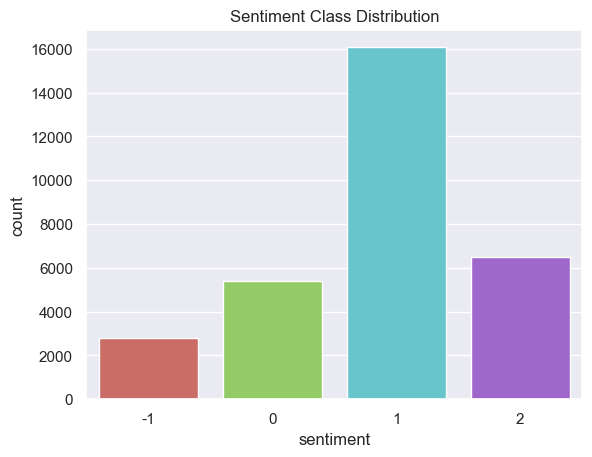

In [76]:
# graphical representaion of class distribution 
sns.countplot(x = 'sentiment', data = df_train, palette="hls")
plt.title("Sentiment Class Distribution");

##### Observation
The distribution of data across class is imbalance; in a dataset with 4 classes (1,2,0 and -1),the class 1 occupies more than 50% of the dataset, while class -1 occupies less than 10% of the dataset. Class imbalance is something that can greatly affect the performance of models, therefore, it has to be fixed.

In [35]:
##check for null values in the train dataset
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [36]:
##check for null values in the train dataset
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [37]:
train['tweetid'].value_counts()

897853122080407553    1
860404952740528128    1
956582766694600704    1
958628132361302016    1
806328810459131904    1
                     ..
687117513331732481    1
955768079337877504    1
796334335293095941    1
864696629542010880    1
666236638155141121    1
Name: tweetid, Length: 30759, dtype: int64

In [38]:
train['sentiment'].value_counts()

 1    16073
 2     6493
 0     5400
-1     2793
Name: sentiment, dtype: int64

#### Words present in the tweet

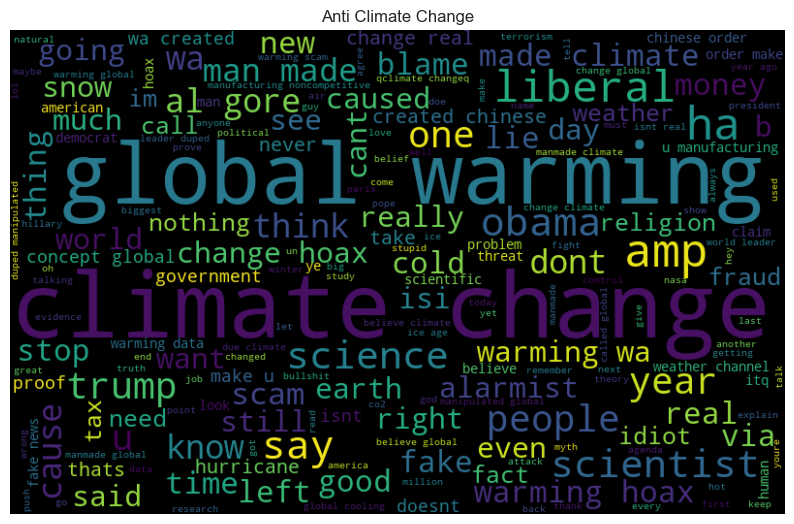

In [84]:
# importing wordcloud
from wordcloud import WordCloud

# checking the normal words used by Anti climate change messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'black',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Anti Climate Change')
plt.show()

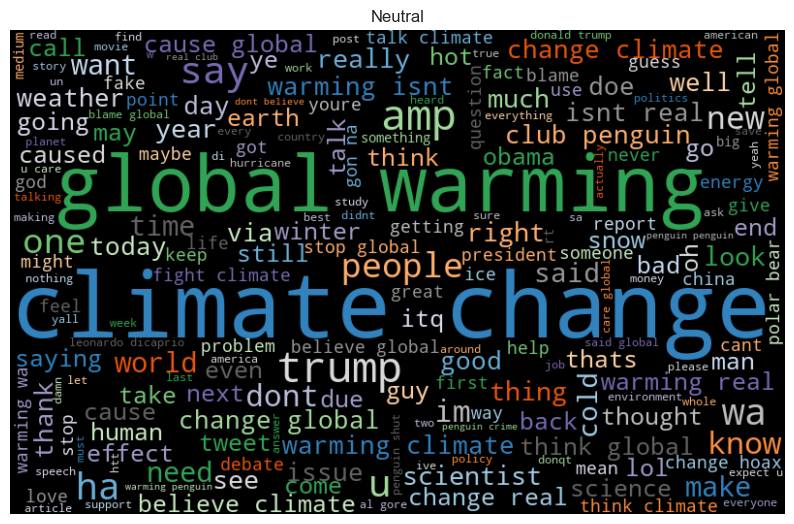

In [85]:
# checking the normal words used by Neutral messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 0]])

wordcloud = WordCloud(colormap='tab20c',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

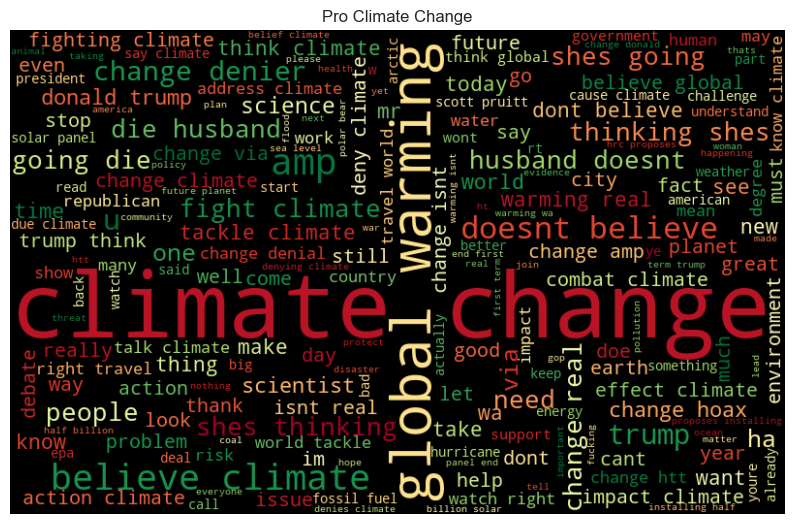

In [88]:
# checking the normal words used by Pro Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 1]])

wordcloud = WordCloud(colormap='RdYlGn',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Pro Climate Change')
plt.show()

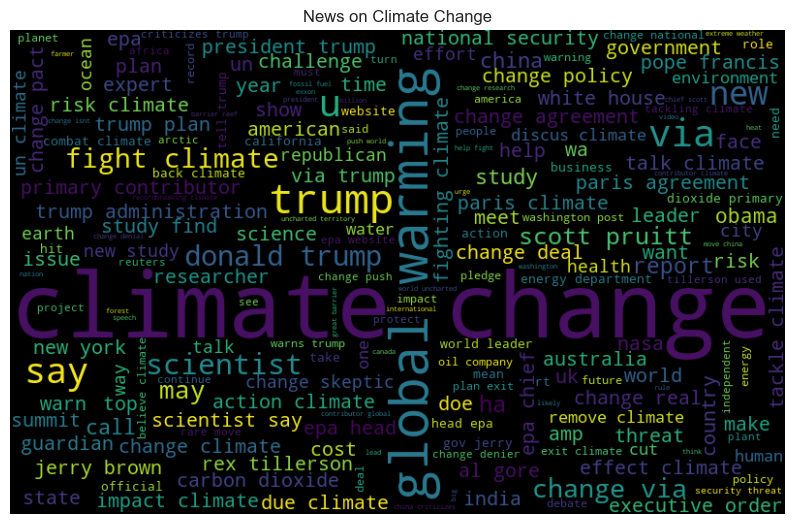

In [89]:
# checking the normal words used by News on Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('News on Climate Change')
plt.show()

In [39]:
# let's take a look at what some of the tweets look like, we'd pick tweet indexes, one for each sentiment class.
print(train['message'].loc[1])#tweet representative for sentiment class -1
print(train['message'].loc[26274])#tweet representative for sentiment class 2
print(train['message'].loc[3761])#tweet representative for sentiment class 0
print(train['message'].loc[9028])#tweet representative for sentiment class 1

All the biggest lies about climate change and global warming DEBUNKED in one astonishing interview https://t.co/NgvIPO4wYA
Obamas Earth Day trek to Fla. to highlight climate change
RT @BrianMalkinson: Back door knocking in Spruce Cliff. Important discussions on Westgate School and climate change #yyccurrie #abndp httpsÃ¢â‚¬Â¦
RT @tarotgod: when will ppl understand that global warming, deforestation, &amp; consumption of animal products is a bigger threat to the earthÃ¢â‚¬Â¦


#### Observations:
the following observations were made from viewing the data:
1. There are no missing values in the dataset. 
2. The train dataset have 15,819 rows and 3 columns. 
3. The test dataset has 10,546 rows and 2 columns, the missing column here is what we are expected to predict.
4. The words in the message feature are both in upper and lower case.
5. There are lots of punctuations and special characters in the message feature.
5. Some tweets have url

## 5. Data Pre-processing
The following measures will be carried out:
1. data cleaning
2. remove stopwords
3. tokenisation
4. lemmatisation

#### 5.1 Data cleaning/Noise removal

Text analytics relies on the elimination of noise, which refers to unnecessary information, to ensure data is presented in a usable format. This step is crucial in eliminating text and characters that do not contribute to the analysis. Examples of such irrelevant elements include URLs, non-essential items like hyphens or special characters, web scraping, HTML, and CSS information. While some techniques are commonly employed, our unique dataset demands innovative thinking on our part to effectively remove noise.


The noise removal phase consists of the following steps:

 -  Transforming all text to lower case
 -  Removing web-urls, colons, @, #, etc.
 -  Remoivng punctuation
 -  Removing printables

In [47]:
## make a copy of the datasets
clean_train= train.copy() # creating a copy of the train dataset
clean_test= test.copy() # creating a copy of the test dataset

In [56]:
# create a function to convert words to lower case in a dataframe
def lower_all(df, column_name):
    column_names= df.columns
    lowered= df[column_name].str.lower()
    return lowered
# Remove web-urls
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ' '
    df['message'] = df['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)
# Remove text with colons
    df['message'] = df['message'].replace(r'^.+:', '', regex=True)

# Remove words starting with @
    pattern = r'@\w+'
    subs = ''
    df['message'] = df['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)

# Remove words starting with #
    patt = r'#\w+'
    sub = ''
    df['message'] = df['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)
    
# Remove printables
    df['message'] = df['message'].apply(lambda x: ''.join(["" if  i not in set(printable) 
                                                           else i for i in x]))

    return df

In [123]:
#confirm that the lowercase function worked
clean_train = text_cleaner(train)
clean_train.head()

,sentiment,message,tweetid
0,-1,funny hell canada demand gender right climate ...,897853122080407553
1,-1,biggest lie climate change global warming debu...,925046776553529344
2,-1,coming revelation qglobal warmingq resembles l...,696354236850786305
3,-1,wont,846806509732483072
4,-1,obama ha control climate worst snake oil sales...,628085266293653504


In [58]:
#creating a function that removes punctuation from the data frame
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [59]:
# removing punctuation from the train data 
train['message'] = train['message'].apply(remove_punctuation)

In [60]:
# check if punctuation were removed from the train data 
train.head()

,sentiment,message,tweetid
0,-1,funny as hell canada demands gender rights an...,897853122080407553
1,-1,all the biggest lies about climate change and ...,925046776553529344
2,-1,the coming revelation of the qglobal warmingq ...,696354236850786305
3,-1,it wont,846806509732483072
4,-1,obama has no control over the climate he is t...,628085266293653504


In [61]:
# removing punctuation from the test data 
test['message'] = test['message'].apply(remove_punctuation)

In [62]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,The scary unimpeachable evidence that climate ...,224985
3,Karoli morgfair OsborneInk dailykos \nPutin go...,476263
4,RT FakeWillMoore Female orgasms cause global w...,872928


#### 5.5. Removal of stop words, tokenisation and lemmatisation

Now with all the necessary noise removal functions applied to the text data successfully, the nest step was to separate the text sentences into separate tokens, lemmas and remove any stop words from it. A single function that can perform all the three tasks was written and employed;

In [63]:
# Function for tokenization, lemmatization and removing stopwords
def tokenize_lemmatize_stopwords(df):
    
# importing TreebankWordTokenizer
    from nltk.tokenize import TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()

# importing WordNetLemmatizer
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
#import stopwords
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
   
#tokenize
    df['message'] = df['message'].apply(tokenizer.tokenize)

# lemmatize
    df['message'] = df['message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
# remove stopwords
    df['message'] = df['message'].apply(lambda x: [word for word in x 
                                                   if word not in stop_words])

    return df


In [64]:
# appling the tokenize_lemmatize_stopwords function to the train data
train = tokenize_lemmatize_stopwords(train)

In [65]:
train.head()

,sentiment,message,tweetid
0,-1,"[funny, hell, canada, demand, gender, right, c...",897853122080407553
1,-1,"[biggest, lie, climate, change, global, warmin...",925046776553529344
2,-1,"[coming, revelation, qglobal, warmingq, resemb...",696354236850786305
3,-1,[wont],846806509732483072
4,-1,"[obama, ha, control, climate, worst, snake, oi...",628085266293653504


In [66]:
# appling the tokenize_lemmatize_stopwords function to the test data
test = tokenize_lemmatize_stopwords(test)
test.head()

,message,tweetid
0,"[Europe, looking, China, make, sure, alone, fi...",169760
1,"[Combine, polling, staffer, climate, change, w...",35326
2,"[The, scary, unimpeachable, evidence, climate,...",224985
3,"[Karoli, morgfair, OsborneInk, dailykos, Putin...",476263
4,"[RT, FakeWillMoore, Female, orgasm, cause, glo...",872928


NOTE: The text data has now been cleaned, tokenized and lemmatized after which the text tokens 
      were then converted to corpus. This is an important step that removes all the delimiters 
      before vectorization.

### FEATURE ENGINEERING

For feature engineering, we would consider the following
1. Vectorise data set to create features
2. Balance class Distribution

#### Vectorise Data

Vectorizing data refers to the process of transforming raw textual or categorical data into numerical vectors that can be used as input for machine learning algorithms. Most machine learning models require numerical inputs, and vectorization is a way to represent non-numeric data in a format that can be understood by these models.

The bag-of-words (BoW) model is one of the simplest text feature extraction techniques, used in many natural language processing (NLP) applications such as text classification, sentiment analysis, and topic modeling. This same model will be applied in this project for analysis. 

#### Conversion to Corpus

In [68]:
# Corpus function
def convert_to_corpus(data, col):
    def operation(word_list):
        string = ' '.join(word_list)
        return string
    
    df = data.copy()
    df[col] = df[col].apply(operation)
    
    return df

In [69]:
# apply corpus function to train data
train = convert_to_corpus(train, 'message')
train.head()

,sentiment,message,tweetid
0,-1,funny hell canada demand gender right climate ...,897853122080407553
1,-1,biggest lie climate change global warming debu...,925046776553529344
2,-1,coming revelation qglobal warmingq resembles l...,696354236850786305
3,-1,wont,846806509732483072
4,-1,obama ha control climate worst snake oil sales...,628085266293653504


In [70]:
# apply courpus function to test data
test = convert_to_corpus(test, 'message')
test.head()

,message,tweetid
0,Europe looking China make sure alone fighting ...,169760
1,Combine polling staffer climate change woman r...,35326
2,The scary unimpeachable evidence climate chang...,224985
3,Karoli morgfair OsborneInk dailykos Putin got ...,476263
4,RT FakeWillMoore Female orgasm cause global wa...,872928


### Bag of Words Model

In [90]:
# Create bag of words with max features of 2500, ngram range of (1, 4).
cv = CountVectorizer(max_features=2500, ngram_range=(1, 4))
X = cv.fit_transform(train["message"]).toarray()
Y = train["sentiment"]


# creating bag of words for the test data
x_test_data = cv.fit_transform(test["message"]).toarray()

- Now that bags of words have been successfully created in both train and test dataset, next step is to compute the IDF values by calling tfidf_transformer.fit(x) on the word counts we computed earlier. 

#### TF-IDF Feature Extraction 

TF-IDF is a technique for extracting features from text documents. It calculates the importance of words by considering both their frequency within a document (Term Frequency) and their rarity across the entire corpus (Inverse Document Frequency). TF-IDF assigns higher scores to words that are important within a document but less common across the corpus. This feature extraction process enables text documents to be represented as numerical vectors, where each element corresponds to the TF-IDF score of a word. This representation helps in tasks like document classification, information retrieval, and text clustering.

In [91]:
# importing TF-IDF transformer
from sklearn.feature_extraction.text import TfidfTransformer 

# for the train data
tfidf = TfidfTransformer(smooth_idf=True,use_idf=True) 

# Transform x values using TF-IDF transformer
X = tfidf.fit_transform(X)


# Transform x_test_data values using TF-IDF transformer
x_test_data = tfidf.fit_transform(x_test_data)

Once the IDF values are computed, it is important to address data imbalance. The exploratory data analysis revealed an imbalance among the four classes, with the 'pro' class having significantly more data compared to the others. Balancing the dataset is crucial for achieving accurate models, higher balanced accuracy, and improved detection rates. A balanced dataset helps prevent model bias towards a specific class and is essential for effective classification. 

There are various approaches to tackle imbalanced data, including undersampling, oversampling, and the Synthetic Minority Oversampling Technique (SMOTE). SMOTE is a widely used method that generates synthetic instances to balance class distribution by replicating minority class examples. In this project, SMOTE was employed as the balancing technique.

### Data Balancing

In [100]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [101]:
# Define SMOTE-Tomek Links
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = resample.fit_resample(X, Y)


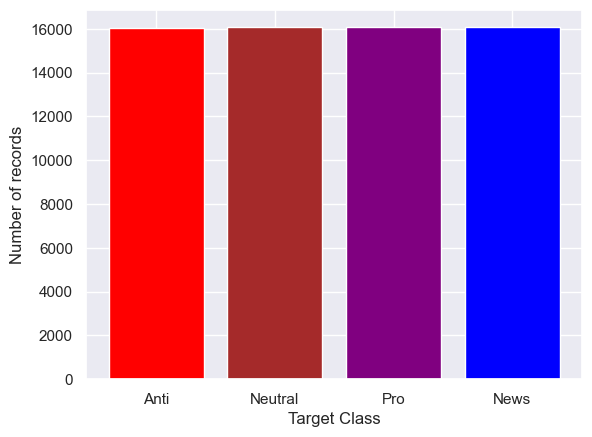

In [102]:
# balancing the classes
# isolating all the classes in the y column 
Anti = y[y == -1]
Neutral = y[y == 0]
Pro = y[y== 1]
News = y[y== 2]

# plotting the total sentiment features on a bar graph
labels = y.unique()
heights = [len(Anti),len(Neutral), len(Pro), len(News)]
plt.bar(labels, heights, color=['red','brown','purple','blue'])
plt.xticks(labels,['Anti','Neutral', 'Pro', 'News'])
plt.ylabel("Number of records")
plt.xlabel('Target Class')
plt.show()

The figure showed an evenly distributed dataset in contrast to the starting data sample shown in the EDA section. Next step was to scale the data by standardization as a way of handling the outliers if any.

#### Data Splitting

In [103]:
# spliting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size = 0.20, random_state = 42)

print(x_train.shape)  
print(x_test.shape) 
print(y_train.shape)  
print(y_test.shape)  

(51408, 2500)
(12853, 2500)
(51408,)
(12853,)


After successfully splitting the data into training and testing datasets, the subsequent task involved experimenting with class weights.

In the process of constructing a machine learning model, specifying class weights in the original dataset serves as an alternative approach to the previously employed balancing method. This allows the algorithm to assign greater importance to minority classes. The calculation of class weights can be achieved using the class_weight() function from the sklearn.utils library.

#### Class Weights 

In [105]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = dict(zip(classes, cw))
weights

{-1: 1.0075258701787395,
 0: 0.991513655300108,
 1: 0.9984462399005594,
 2: 1.0026525198938991}

Now, it becomes more straightforward to supply the class weights as input to a classifier, such as a DecisionTreeClassifier, and evaluate the model's performance.

With the data transformed into a format that is compatible with machine learning models, specifically prepared for training, the subsequent phase involved the training of multiple models.

## 7. Modelling

To make predictions for the target variable, sentiment, we will create five regression models in the listed order:

**Logistic Regression** serves as the foundational model, utilizing a logistic function to model the dependent variable.

**KNeighbors Classifier** operates by calculating distances between a query and all examples in the data, selecting the specified number of closest examples (K), and making predictions based on the most frequent label (classification) or label averaging (regression).

**Decision Tree Classifier** partitions data into subsets through recursive binary splitting, aiming to minimize Mean Square Error.

**SVC (Support Vector Classifier)** maps data points to a high-dimensional space and identifies the optimal hyperplane to separate the data into two classes.

**Random Forest Classifier** is an ensemble bagging model based on decision trees. It trains on different subsets of the data to reduce variance error.

All models will follow the same procedure, consisting of:

1. Creating a classifier model object.
2. Fitting the model to the training dataset.
3. Making predictions using the validation dataset.

### Logistic Regression

In [115]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [118]:
# training and testimg Logistic Regression model on the data
lgr = LogisticRegression(C= 100, class_weight = weights, multi_class='ovr')
lgr.fit(x_train, y_train)

y_score = lgr.predict_proba(x_test)
y_pred_lr = lgr.predict(x_test)


# calculating the f1 score for the x_test set
Log_classifier  = f1_score(y_test, y_pred_lr,
                            pos_label='positive',
                             average='micro')
    
print("f1 score :", Log_classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

f1 score : 0.6904224694623823
[[2671  355  154  106]
 [ 553 1915  373  270]
 [ 448  428 1948  377]
 [ 412  196  307 2340]]


NameError: name 'plot_roc' is not defined